# PIL

In [1]:
from PIL import Image

In [2]:
filename = 'img.jpg'
img = Image.open(filename).convert('L')

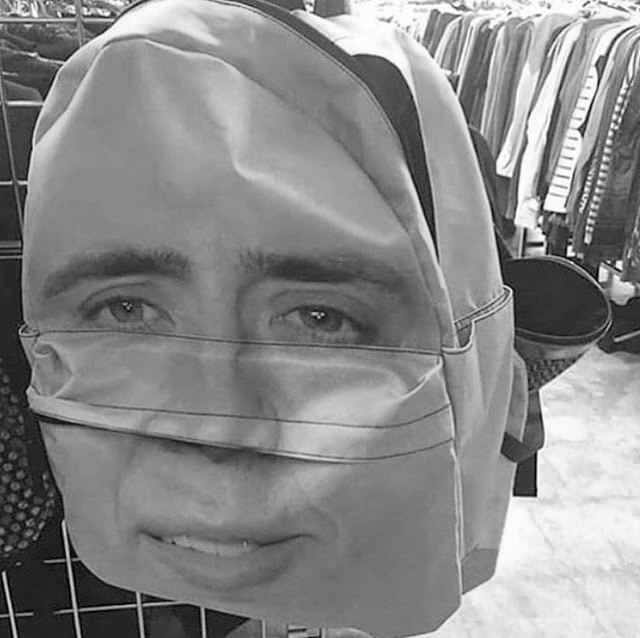

In [3]:
display(img)

In [4]:
img.thumbnail((128, 128))

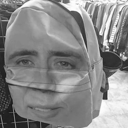

In [5]:
display(img)

In [7]:
box = (100, 100, 400, 400)
region = img.crop(box)
region = region.transpose(Image.ROTATE_180)
img.paste(region, box)

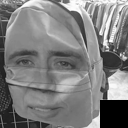

In [8]:
display(img)

In [9]:
resized_img = img.resize((500, 500))
rotated = img.rotate(55)

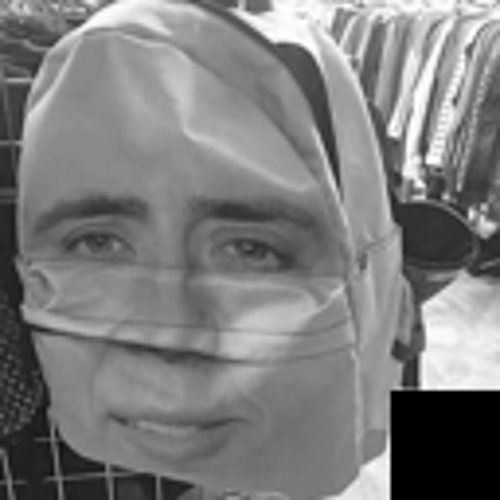

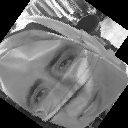

In [10]:
display(resized_img, rotated)

# Matplotlib

In [11]:
from pylab import *

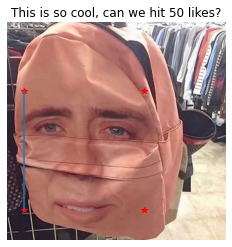

In [12]:
img = array(Image.open(filename))
imshow(img)
x = [50, 50, 400, 400]
y = [200, 550, 200, 550]
plot(x, y, 'r*')
plot(x[:2], y[:2])
title('This is so cool, can we hit 50 likes?')
axis('off')
show()

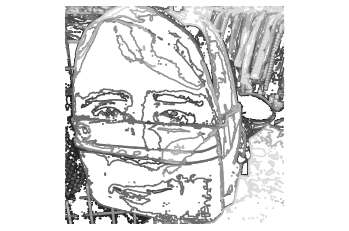

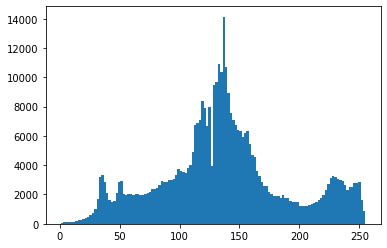

In [13]:
img = array(Image.open(filename).convert('L'))
figure()
gray()
contour(img, origin='image')
axis('equal')
axis('off')
figure()
hist(img.flatten(), 128)
show()

# NumPy

In [15]:
img.shape, img.dtype, img[10, 20]

((638, 640), dtype('uint8'), 197)

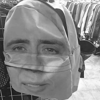

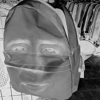

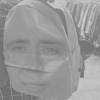

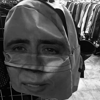

In [16]:
img2 = 255 - img
img3 = 100/255 * img + 100
img4 = 255 * (img/255)**2
display(Image.fromarray(uint8(img)).resize((100, 100)),
        Image.fromarray(uint8(img2)).resize((100, 100)),
        Image.fromarray(uint8(img3)).resize((100, 100)),
        Image.fromarray(uint8(img4)).resize((100, 100)))

In [17]:
def imresize(im, sz):
    im = Image.fromarray(uint8(im))
    return array(im.resize(sz))

def histeq(im, bins=256):
    imhist, bs = histogram(im.flatten(), bins, normed=True)
    cdf = imhist.cumsum()
    cdf = 255 * cdf/ cdf[-1]
    im2 = interp(im.flatten(), bs[:-1], cdf)
    return im2.reshape(im.shape), cdf

In [18]:
im = array(Image.open(filename).convert('L'))
im2, cfg = histeq(im)

<ipython-input-17-b3f2f613a1ba>:6: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  imhist, bs = histogram(im.flatten(), bins, normed=True)


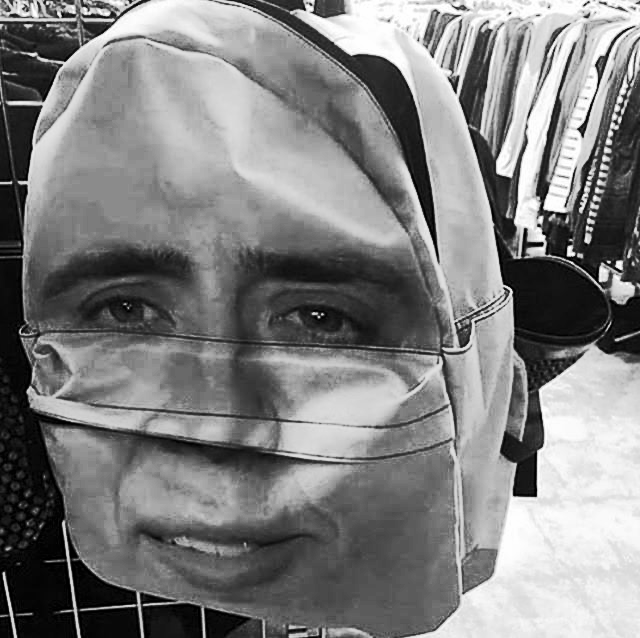

In [19]:
display(Image.fromarray(im2).convert('L'))

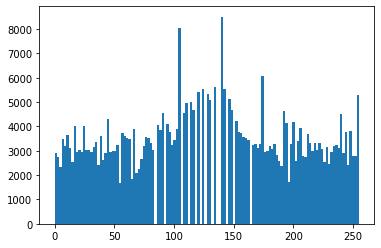

In [20]:
figure()
hist(im2.flatten(), 128)
show()

In [27]:
def compute_avg(imlist):
    averageim = array(Image.open(imlist[0], 'f'))
    for imname in imlist[1:]:
        try:
            averageim += array(Image.open(imname))
        except:
            averageim /= len(imlist)
    return array(averageim, 'unit8')

def pca(X):
    num_data, dim = X.shape
    mean_X = X.mean(axis=0)
    X -= mean_X
    
    if dim > num_data:
        M = dot(X, X.T)
        e, EV = linalg.eigh(M)
        tmp = dot(X.T, EV).T
        V = tmp[::-1]
        S = sqrt(e)[::-1]
        for i in range(V.shape[1]):
            V[:, i] /= S
    else:
        U, S, V = linalg.svd(X)
        V = V[:num_data]
    return V, S, mean_X


In [ ]:
imlist = ['img.jpg', 'img2.jpg', 'img3.jpg']
im = array(Image.open(imlist[0]))

m, n = im.shape[0:2]
imnbr = len(imlist)

immatrix = array([array(Image.open(im)).flatten() for im in imlist], 'f')
V, S, immean = pca(immatrix)

figure()
gray()
subplot(1, 3, 1)
imshow(immean.reshape(m, n))
for i in range(imnbr-1):
    imshow(V[i].reshape(m, n))

show()


# Pickle

In [33]:
# import pickle
# pickle.dump(anything, filename)
# anything = pickle.load(filename)

# SciPy

In [34]:
from scipy.ndimage import filters

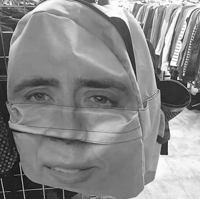

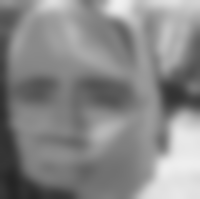

In [44]:
im = Image.open(filename).convert('L')
im.thumbnail((200, 200))
im = array(im)
im2 = filters.gaussian_filter(im, 5)
display(Image.fromarray(im), Image.fromarray(im2))

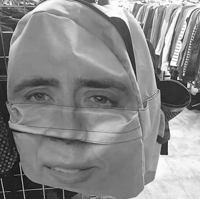

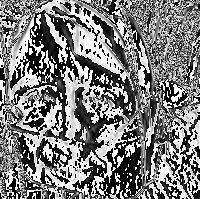

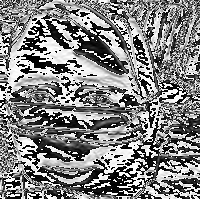

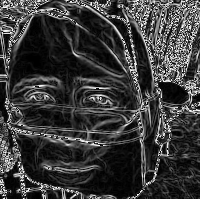

In [59]:
imx = zeros(im.shape)
filters.sobel(im, 1, imx)

imy = zeros(im.shape)
filters.sobel(im, 0, imy)

magnitude = sqrt(imx**2 + imy**2)
print()

display(Image.fromarray(im),
        Image.fromarray(uint8(imx)),
        Image.fromarray(uint8(imy)),
        Image.fromarray(uint8(magnitude)))